In [1]:
## Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
## Importing Dataset
from keras.datasets import mnist

mnist = keras.datasets.mnist

(train_X, train_y), (test_X, test_y)  = mnist.load_data()

In [3]:
## Understanding Data
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(train_X[4])
print(train_y[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

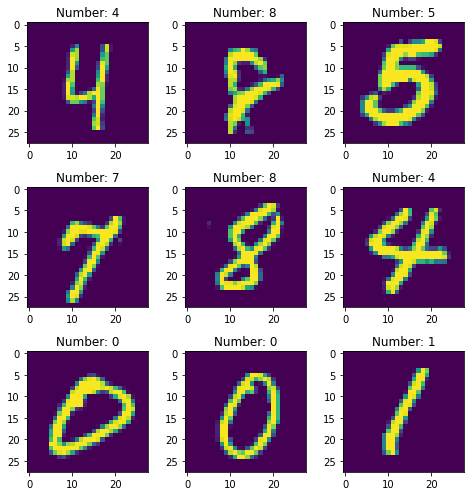

In [9]:
## Visualizing Data

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(331+i)
    idx = np.random.choice(60000) 
    plt.imshow(train_X[idx])
    plt.title(f"Number: {train_y[idx]}")
    plt.tight_layout()
plt.show()


In [10]:
## Data preprocessing

train_X = train_X/255
test_X = test_X/255

In [13]:
## Defining Nueral Network

model = tf.keras.models.Sequential([keras.layers.Flatten(),
                                    keras.layers.Dense(units=512, activation='relu'),
                                    keras.layers.Dense(units=10, activation='softmax')])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
## Training 

model.fit(train_X, train_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.9884
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0287 - accuracy: 0.9906
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0140 - accuracy: 0.9951


In [17]:
## Evaluating on test set

model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9805


[0.08036360889673233, 0.9804999828338623]

In [18]:
## Predictions

classifications = model.predict(test_X)

print(classifications[4])

[1.0487363e-09 9.6233216e-14 7.3504913e-10 5.6574450e-13 9.9998879e-01
 5.3566884e-13 5.1919056e-11 1.7051990e-08 3.6469470e-11 1.1179594e-05]


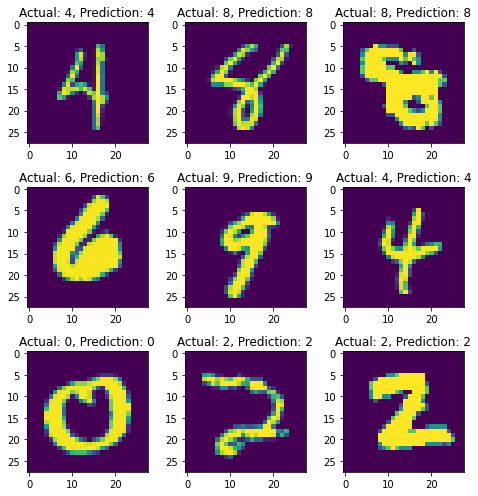

In [24]:
## Visualizing Predictions

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(331+i)
    idx = np.random.choice(10000) 
    plt.imshow(test_X[idx])
    plt.title(f"Actual: {test_y[idx]}, Prediction: {np.argmax(classifications[idx])}")
    plt.tight_layout()
plt.show()


In [39]:
wrong_idx = (np.argmax(classifications, axis=-1)!=test_y) 
wrong_idx = np.argwhere(wrong_idx)
wrong_idx = np.squeeze(wrong_idx)
print(wrong_idx)

[ 149  247  321  340  381  445  447  448  449  495  582  619  684  720
  740  938  947  951  956 1003 1014 1039 1112 1156 1178 1182 1226 1232
 1242 1247 1299 1319 1326 1328 1393 1395 1522 1527 1530 1549 1553 1609
 1678 1681 1754 1790 1800 1878 1901 1941 2004 2024 2053 2098 2109 2118
 2130 2135 2182 2186 2272 2280 2293 2387 2406 2408 2488 2534 2582 2597
 2607 2630 2648 2654 2771 2877 2896 2921 2927 2939 2953 2995 3073 3117
 3172 3289 3333 3457 3490 3503 3520 3558 3559 3567 3601 3662 3681 3727
 3776 3780 3796 3808 3853 3893 3902 3906 3941 3943 4065 4078 4156 4163
 4176 4194 4199 4201 4224 4248 4289 4433 4536 4639 4740 4751 4807 4808
 4823 4860 5331 5457 5634 5642 5676 5734 5749 5842 5887 5926 5936 5955
 5973 5997 6009 6011 6023 6059 6071 6101 6166 6168 6555 6559 6571 6572
 6597 6625 6632 6651 6735 6755 6783 6847 7216 7847 7856 7899 7928 7990
 8094 8246 8277 8325 8520 8527 9009 9015 9019 9024 9071 9280 9587 9669
 9679 9729 9745 9749 9755 9764 9768 9770 9779 9792 9839 9858 9944]


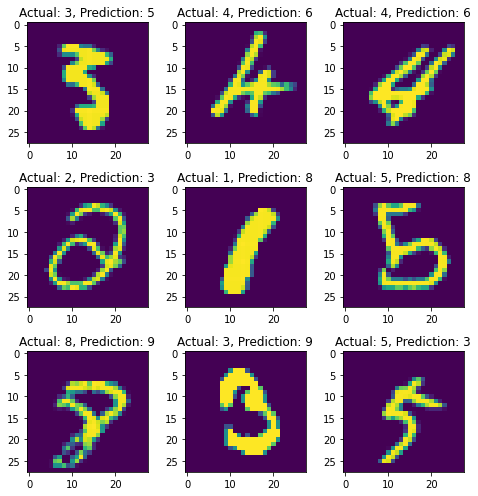

In [40]:
## Visualizing wrong Predictions

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(331+i)
    idx = np.random.choice(wrong_idx) 
    plt.imshow(test_X[idx])
    plt.title(f"Actual: {test_y[idx]}, Prediction: {np.argmax(classifications[idx])}")
    plt.tight_layout()
plt.show()